In [325]:
#로지스틱 회귀분석
#가장 간단한 classifier인 선형회귀와 동일한 기반을 공유하는 로지스틱 회귀를 소개하지만 분류 문제를 목표로 함.

#4장에서 다루는 내용
## 이진 및 다중 클래스 문제에 대한 분류 문제의 공식 및 수학적 정의
## 클래시파이어의 성능을 평가하는 방법, 즉 그들의 행렬
## 로지스틱회귀 저변에 깔려 있는 수학
## 로지스틱회귀를 위해 특별히 구축된 SGD 공식 재검토
## 다중 클래스 로지스틱회귀를 사용한 다중 클래스 사례

In [327]:
#분류 문제 정의

In [329]:
#회귀: 목표변수가 연속적인 값을 추정하는 연산으로 제시. 예측변수는 (-무한대,무한대) 범위의 실수.
#분류는 클래스를 예측. 즉, 유한한 클래스 집합의 인덱스를 예측.
#가장 간단한 경우는 이진 분류(binary classification)로 명명. 아웃풋은 일반적으로 부울 값(참/거짓)임.
#클래스가 참이면 샘플을 일반적으로 양성 샘플이라 하고, 그렇지 않으면 음성 샘플이라고 함
##회귀 문제의 아웃풋에 임계값을 부여하는 것은 실제로 그 값이 고정된 임계값보다 큰지 작은지를 결정하는 이진 분류 문제임.

#아웃풋이 다중 값을 갖는 경우, 분류는 다중 클래스 분류(multiclass classification)로 명명. 일반적으로 가능한 라벨은 수준이나 클래스로 명명됨.
 #라벨의 목록은 유한해야 하며 미리 알려져 있어야 함.

In [331]:
##문제의 공식화:이진 분류

In [333]:
#예측 작업을 하는 동안 분류 함수는 새로운 특성 벡터에 적용되고 클래시파이어의 아웃풋은 입력 샘플이 분류되는 클래스 즉, 예측된 라벨을 나타냄.
#완벽한 클래시파이어는 가능한 모든 입력에 대해 올바른 클래스 y를 예측함.
#특성 벡터 x는 숫자로 구성.

In [335]:
#scikit-learn 라이브러리의 make_classifer 메소드가 매우 유용
#클래스의 수, 문제의 차수 및 관찰 횟수를 파라미터로 제공해 분류를 위한 더미 데이터셋을 생성
#각 특성은 유익한 정보를 제공해야 하며 (중복되지 않아야 하고) 각 클래스는 단일 점 구름으로 구성

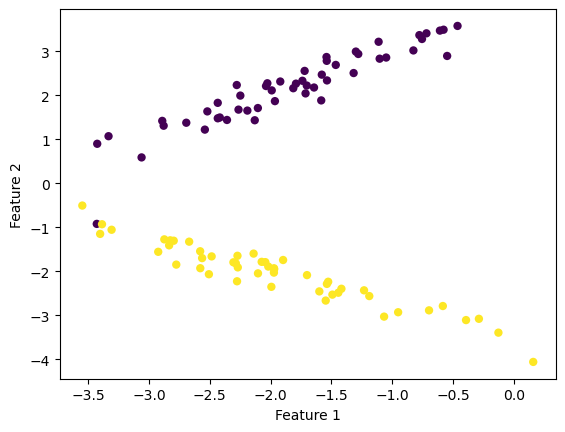

In [337]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=100, n_features=2,
                        n_informative=2, n_redundant=0,
                        n_clusters_per_class=1,
                        class_sep=2.0, random_state=101)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,
            linewidth=0,edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [339]:
##클래시파이어의 성능 평가

In [341]:
#정의된 라벨의 정확성 또는 완전성, 분류 오류 횟수의 최소화, 특정 라벨을 가질 확률에 대한 올바른 정렬 등과 같이 몇 가지 다른 분류 목표가 있을 수 있으므로 단일 척도는 없다.
#모든 측정은 비용 행렬을 적용한 후 분류 행렬로부터 도출할 수 있음.
#혼동행렬(confusion matrix): 각각의 클래스에 대해 정확한 분류와 잘못 분류한 오류의 시각적인 영향력을 제공하는 가장 단순한 측정 지표
 #행: 실제 라벨, 열: 예측된 라벨

In [343]:
y_orig=[0,0,0,0,0,0,1,1,1,1]
y_pred=[0,0,0,0,1,1,1,1,1,0]

In [345]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig,y_pred)

array([[4, 2],
       [1, 3]])

In [347]:
#행렬을 통해 몇가지 증거 추출!
##샘플의 수는 10개
#원본에서 0으로 분류된 샘플의 수는 6개, 1로 분류된 수는 4개 : 서포트
#예측된 데이터 세트에서 0으로 분류된 샘플의 수는 5개, 로 분류된 수는 5개(열의 합계)
#올바른 분류는 7개(대각선의 합)
#분류 오류는 3개(대각선에 있지 않은 모든 숫자의 합)

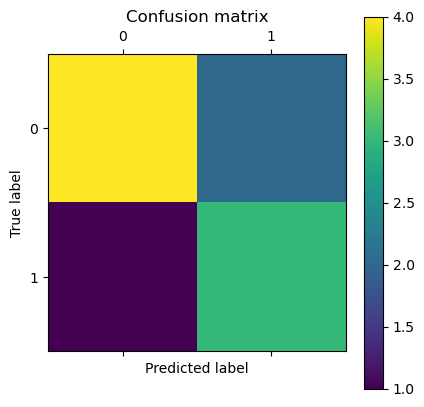

In [349]:
plt.matshow(confusion_matrix(y_orig,y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [351]:
#클래시파이어의 성능을 평가하기 위해 살펴볼 첫 번째 측정 기준: 정확도(accuracy)
#정확도: 총 샘플 개수에 대한 정확한 분류의 백분율
 #대각선상의 합계를 행렬 요소의 합계로 나눔으로써 오류 측정값을 혼돈 행렬로부터 직접 얻을 수 있음

from sklearn.metrics import accuracy_score
accuracy_score(y_orig,y_pred)

0.7

In [353]:
#정밀도(precision): 하나의 라벨만 고려하며, 해당 라벨에 대해 정확한 분류의 백분율을 계산.얻은 것의 질에 관한 것(라벨"1"로 표시된 결과의 품질)
 #혼돈 행렬에서 오른쪽 하단에 있는 숫자를 두번째 열에 있는 요소의 합으로 나눈 값
#scikit-learn에서 이 함수는 검사 대상 클래스만 참으로 표시되는 이진 입력을 요구(class indicator)
 #각 라벨에 대해 정밀도 점수를 추출하려면 각 클래스를 이진 벡터로 만들어야 함

from sklearn.metrics import precision_score
precision_score(y_orig,y_pred)

0.6

In [355]:
#재현율(recall): 얻을 수 있었던 것의 질에 관한 것(제대로 추출 할 수 있는 "1"의 인스턴스가 얼마나 많이 있었는지에 대한 품질)
from sklearn.metrics import recall_score
recall_score(y_orig,y_pred)

0.75

In [357]:
#정밀도와 재현율: 클래시파이어가 클래스에 얼마나 잘 수행했는지를 나타내는 두가지 지표
#조화 평균을 사용해 두 개의 점수를 합하면 포괄적인 f1-점수를 얻을 수 있으므로 두 오류 측정의 성능을 한눈에 파악 가능
from sklearn.metrics import f1_score
f1_score(y_orig,y_pred)

0.6666666666666666

In [359]:
#많은 오류 점수가 존재하는 경우, 각 클래스에 대해 모든 점수를 계산하기 위한 메소드를 제공하는 scikit-learn을 사용
from sklearn.metrics import classification_report
print(classification_report(y_orig,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [361]:
# 확률 기반 접근성 정의

In [363]:
#분류: 특성 벡터가 주어지면 조건부 확률을 최대화하는 클래스(0또는1)를 찾음.
#회귀 문제에서 클래스는 더 이상  "0" 또는 "1"(문자열로서의)이 아니라, 클래스 "1"에 속할 확률을 나타내는 1.0과 0.0임.
#확률론적 해석을 사용해 더미 분류 문제에 다중 선형 리그레서 적용
 #동일한 데이터셋을 재사용하지만, 먼저 데이터셋을 훈련 집합과 테스트 집합으로 분리 후, y벡터를 부동 소수점 값으로 변환

In [365]:
from sklearn.model_selection import train_test_split #model_selection 함수로 변경
X_train, X_test, y_train,\
y_test= train_test_split(X,y.astype(float),\
        test_size=0.33,random_state=101)
print(y_test.dtype)
print(y_test)
#데이터셋을 훈련 집합과 테스트 집합 두 개로 나누고, y배열에 있는 모든 숫자를 부동 소수점으로 변환.

float64
[0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0.]


In [367]:
#회귀 진행
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
#리그레서의 예측인 아웃풋은 클래스 "1"에 속할 확률이어야 함. 0이하의 값과 1 이상의 값을 포함하기에 적절하지 않음.
 #0과 1사이의 결과를 클리핑해서 0.5로 임계값을 설정.
 #값이 0.5보다 크면 예측된 클래스는 "1"이고, 그렇지 않으면 예측된 클래스는 "0"임.

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

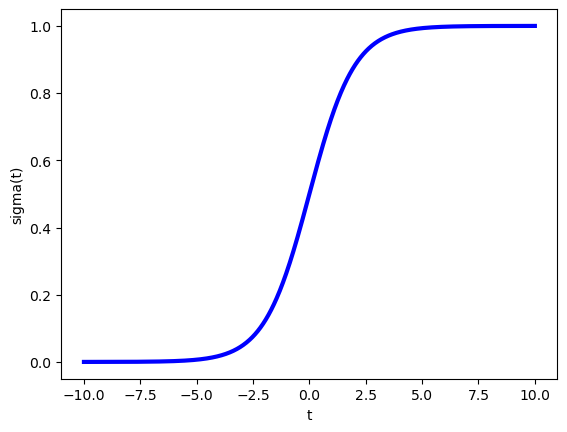

In [369]:
#두 개의 조건을 모두 만족시키기 위한 최선의 방법은 리그레서의 아웃풋을 시그모이드 곡선 또는 s자형의 곡선을 통해 적용하는 것.
 #일반적으로 시그모이드는 R에 있는 값을 범위 [0,1]사이의 값으로 매핑하고 실수 0의 매핑값은 0.5.
#시그모이드 제약 조건을 만족하는 함수는 무한히 많지만 연속적이고 쉽게 식별할 수 있으며 신속하게 계산할 수 있기 때문에 로지스틱이 선택
 #결과가 만족스럽지 못한 경우에는 항상 파라미터 두 개를 도입해 함수의 첨도와 중심을 변경할 수 있음.
import numpy as np

def model(x):return 1/(1+np.exp(-x))

X_vals=np.linspace(-10,10,1000)
plt.plot(X_vals,model(X_vals),color='blue',linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

#매우 낮은 t의 경우, 함수는 0의 값을 향하고 있음
#매우 높은 t의 경우, 함수는 1의 값으로 향하고 있고, t가 0인 중삼애서는 함수가 0.5임.
#시그모이드 함수

In [371]:
#로지스틱 함수와 로짓 함수에 대한 추가 정보

In [373]:
#통계에서 확률에 적용하는 로짓 함수는 로그 손실을 반환->[0,1] 범위의 숫자를 (-무한대, 무한대)로 변환
#로지스틱 회귀는 일반화된 선형모델의 가장 큰 범주의 모델

In [375]:
#몇가지 코드 확인

In [377]:
#리그래서에 대해서 모델을 훈련시키기 위해 fit 메소드 호출을 필요로 하지만, 클래스를 예측하기 위해서는 predict 메소드 호출을 필요로 함
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf=clf.predict(X_test)

print(classification_report(y_test,y_clf))

#여기서는 회귀 연산을 수행하지 않음.(라벨벡터를 정수(혹은 클래스 인덱스)로 구성해야 하는 이유)
#아웃풋은 모든 클래스에 대해 모든 점수가 1에 가까우므로 매우 정확한 예측을 보여줌, 더미 예제 거의 완벽

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



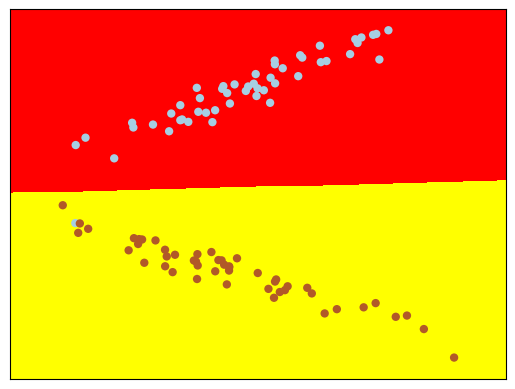

In [379]:
#클래시파이어의 결정 경계를 점검
#2차원 공간에서 어떤 부분이 "1"로 분류되며, "0"은 어디에 있는지를 알기 위해 결정 경계를 시각적으로 볼 수 있는 방법을 보자

h= .02 #메시의 스텝 크기
#결정 경계를 플롯한다. 이를 위해 각각에 색상을 지정
#메시에서 [x_min, m_max]x[y_min, y_max]를 가리킴
X_min, X_max=X[:,0].min() - .5, X[:, 0].max() + .5
y_min, y_max=X[:,1].min() - .5, X[:, 1].max() + .5
XX, yy=np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))
Z=clf.predict(np.c_[XX.ravel(), yy.ravel()])

#결과를 색상을 넣어 플롯한다
Z=Z.reshape(XX.shape)
plt.pcolormesh(XX, yy, Z, cmap=plt.cm.autumn)

#훈련 포인트도 플롯한다.
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(XX.min(), XX.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#"1"은 아래쪽(노란색)에 있고, "0"은 위쪽(빨간색)에 있음.
#스크린샷에서 분류 오류를 즉시 인식할 수 있음

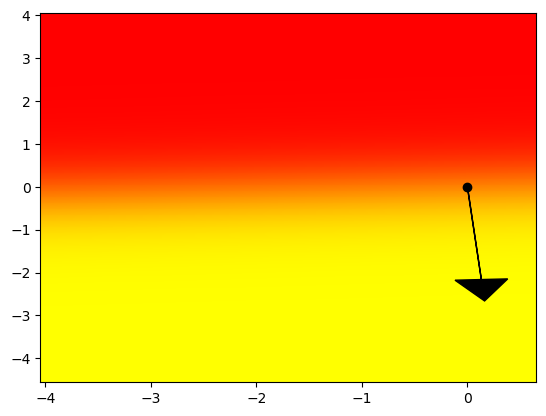

In [381]:
#순수한 확률과 가중치 벡터
#확률을 계산하려면 클래시파이어의 predict_proba 메소드를 사용해야 함. 그것은 각 관찰에 대해 두 개의 값을 반환.
 #첫번째 값은 클래스 "0"이 될 확률이고, 두번째 값은 클래스 "1"이 될 확률
#여기서는 클래스 "1"에 관심이 있기 때문에 모든 관찰에 대해 두번째 값을 선택

Z=clf.predict_proba(np.c_[XX.ravel(), yy.ravel()])[:, 1]
Z=Z.reshape(XX.shape)
plt.pcolormesh(XX,yy, Z, cmap=plt.cm.autumn)

ax=plt.gca() #axes가 아닌 gca로 코드 변경. plt.axes()는 새로운 축을 생성하고 plt.gca()는 현재의 축을 반환
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0,0,marker='o',c='k')

plt.xlim(XX.min(),XX.max())
plt.ylim(yy.min(),yy.max())

plt.show()

#순수한 노란색과 순수한 빨간색은 예측 확률이 각각 1과 0에 매우 가까운 경우.
#검정색 점은 직교 2차원 공간의 원점이며, 화살표는 클래시파이어의 가중치 벡터의 표현. 결정 경계와 직각을 이루며, 클래스 "1"을 가리킴

In [383]:
#클래시파이어가 라벨을 훈련하고 예측하는 데 걸리는 시간
%timeit clf.fit(X,y)
%timeit clf.predict(X)
%timeit clf.predict_proba(X)
#로지스틱회귀는 훈련시키고 모든 클래스의 클래스 및 확률을 예측하는 데 매우 빠른 기술임을 알수 있음

623 μs ± 5.44 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
20.8 μs ± 467 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
22.7 μs ± 68 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [384]:
#로지스틱회귀의 장점과 단점

In [385]:
#로지스틱회귀 장점
 #선형적임. 분류를 위한 선형회귀와 동등
 #이해하기 쉽고, 아웃풋은 가장 가능성이 높은 클래스 또는 멤버십 확률이 될수 있음
 #훈련시키기 간단. 매우 적은 계수(각 특성에 대해 하나의 계수와 한개의 편향)를 갖음. 이는 모델을 매우 작게 저장 가능(단지 가중치 벡터만 저장하면 됨.)
 #계산상 효율적
 #다중 클래스 분류를 위한 확장 기능을 가짐

#로지스틱회귀 단점
 #대부분의 고급 알고리즘에 비해 성능이 좋지 않은 경우가 많음(유연성이 없기 때문에 경계는 선 또는 초평면이 되어야 함)
 #선형적임. 문제가 비선형인 경우 클래시파이어를 데이터셋에 적절하게 적합시킬 수 있는 방법이 없음.

In [386]:
#기울기 하강 재방문

In [387]:
#기울기 하강 기술: 처리 속도를 높이기 위함. 로지스틱회귀모델을 적합시키기 위해 선택하는 일반적인 방법
#선형모델의 적합: 패쇄형, 반복형(패쇄형: 한 단계에서 가능한 최상의 솔루션 제공)
#반복 알고리즘: 각 업데이트에 대해 계산이 거의 필요 없이 단계별로 최소에 도달, 언제든 중단 가능
#로지스틱회귀: 반복 최적화의 기본

In [388]:
#SGD: 한번에 한점씩만 작동
 #로그 우도: 단계별로 한점의 함수일 뿐-> 모든 점에 대한 합계를 제거하고 관찰 대상 점의 이름을 (x,y)로 지정가능
#우도를 최대화
 #일반적인 w의 k번째 계수와 관련해 편도함수를 추출해야 함 

In [389]:
#다중 클래스 로지스틱 회귀

In [390]:
#다중 클래스 로지스틱회귀: 두개 이상의 클래스를 분류하기 위한 로지스틱회귀의 확장
 #기본 알고리즘: one-vs-rest, one-vs-all
 #최종 예측을 하기 위해 가장 높은 확률을 발생시킨 클래시파이어를 선택하기만 하면됨.
  #세 개의 클래시파이어를 훈련시키면, 특성 공간은 두 개의 서브 평면으로 분할되지 않고 세개의 클래시파이어 결정 경계에 따라 나눠짐.
#one-vs-all
 #적합시키기 위한 클래시파이어의 수: 클래스의 수, 모델은 N개의 가중치 벡터로 구성
 #병렬, 다중스레드를 사용해 N개 클래시파이어의 훈련을 동시에 수행가능
 #클래스가 균형적인 경우 각각 클래시파이어에 대해 훈련시간은 비슷하며 예측시간은 동일

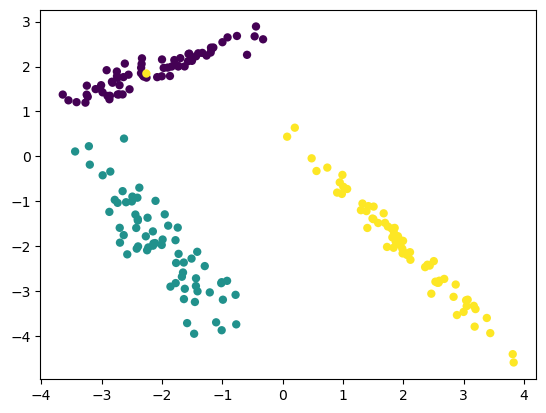

In [391]:
#다중 클래스 분류 예제
#3개의 더미 클래스 데이터셋을 만들고 그것을 훈련 집합과 테스트 집합으로 분할해 다중 클래스 회귀 리그레서를 훈련시킨 후 그것을 훈련 집합에 적용해 마지막으로 경계를 시각화
%reset -f

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=200, n_features=2,
                        n_classes=3, n_informative=2,
                        n_redundant=0, n_clusters_per_class=1,
                        class_sep=2.0, random_state=101)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0,
            edgecolor=None)
plt.show()


In [392]:
from sklearn.model_selection import train_test_split #cross_validation 모듈이 model_selection 모듈로 변경
X_train, X_test, y_train, y_test= train_test_split(X,y.astype(float), test_size=0.33, random_state=101)

In [393]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf=clf.predict(X_test)

In [394]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



<function matplotlib.pyplot.show(close=None, block=None)>

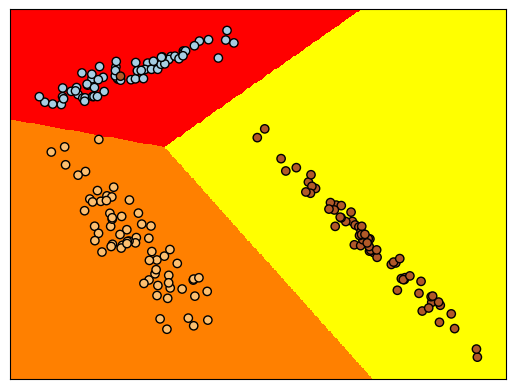

In [395]:
import numpy as np

h=.02 #메시의 스탭 크기

X_min, X_max=X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max=X[:, 1].min() -.5, X[:, 1].max() +.5
XX,yy=np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))
Z=clf.predict(np.c_[XX.ravel(), yy.ravel()])

#결과를 색상으로 플롯한다.
Z=Z.reshape(XX.shape)
plt.pcolormesh(XX, yy, Z, cmap=plt.cm.autumn)

#훈련 포인트도 플롯한다
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(XX.min(), XX.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show
#이 더미 데이터셋에서, 클래시파이어는 완벽한 분류(정밀도, 재현율, f1-점수 모두 1.0)를 달성
#그림에서 결정 경계가 세 개의 영역을 정의하고 비선형 분할을 생성하고 있음을 확인 가능

In [396]:
#첫번째 특성 벡터, 원래 라벨과 그것의 예측된 라벨(모두 클래스 "0"으로 보고) 확인
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [397]:
#세 개의 클래스 각각에 속할 확률을 얻으려면, 정확하게 이진 경우와 동일하게 predict_proba 메소드 적용
 #클래시파이어는 세개의 확률을 출력할 것, 그들의 합은 1, 가장 높은 값은 클래스 "0"에 대한 값
clf.predict_proba(X_test[0].reshape(1,-1)) #1차원 배열을 2차원 배열로 만들기 위해, reshape(1,-1)로 작성

array([[0.85134102, 0.13889977, 0.00975921]])

In [398]:
#예제

In [399]:
#데이터셋은 10,000개의 관측치, 10개의 특성으로 구성, 라벨은 "0"과 "1"인 이진분류
#일반적으로 특성 선택 또는 특성 감소 작업에서 관련 없는 특성을 선택하기 때문에, 모든 융요한 특성을 갖는 것은 머신러닝에서 비현실적인 가설이 아님.
x,y=make_classification(n_samples=10000, n_features=10,
                        n_informative=10, n_redundant=0,
                        random_state=101)

In [400]:
#성능을 측정하는 방법에 초점 X, 계수가 모델을 구성하는 방법에 초점 O
#1. Statsmodel 사용 -> 모델을 훈련시킬것, 모델을 훈련시킬 수 있었는지 또는 실패했는지 여부 확인 가능
#모듈 로드 후, 편향 가중치 W[0]를 갖기 위해 입력 집합에 특성 추가
#logit 객체를 인스턴스화하고 fit 메소드를 사용 
import statsmodels.api as sm
import statsmodels.formula.api as smf

Xc=sm.add_constant(x)
logistic_regression=sm.Logit(y,Xc)
fitted_model=logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [401]:
fitted_model.summary()
#첫번째 표: 데이터셋과 모델 성능, 두번째 표: 모델의 가중치
#converged: 훈련받는 동안 분류 모델이 수렴 단계에 도달했는지 여부를 알려줌. 결과가 참인 경우에만 모델 사용
#Log-Likelihood: 로그 우도
#LL-Null: 절편만 예측변수로 사용하는 경우의 로그 우도
#LLR p-value: 통계적으로 로그 우도 비율이 LLR보다 클 카이 제곱 확률, 모델이 상수 값으로 추정하는 것보다 얼마나 더 좋은지 보여줌
            # LLR은 로그 우도 비율 , null 모델 로그 우도를 대체 모델의 우도로 나눈 값
#pseudo R-squared: 모델에서 설명되지 않은 전체 변동의 비율

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                  0.3671
Time:                        22:19:24   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [402]:
#동일한 결과를 얻기위한 방법: 회귀에 포함된 공식을 기록하는 것
#특성의 이름을 지정한 후 공식을 적기. 마지막으로 메델을 적합시키기.(자동적으로 절편 항목이 모델에 추가됨)
import pandas as pd

xd=pd.DataFrame(x)
xd.columns=['VAR'+str(i+1) for i in range(10)]
xd['response']=y
logistic_regression=smf.logit(formula='response~VAR1+VAR2+VAR3+VAR4+\
                                       VAR5+VAR6+VAR7+VAR8+VAR9+VAR10',data=xd)

fitted_model=logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                  0.3671
Time:                        22:19:24   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [403]:
#접근 방법을 변경해 확률 기울기 하강 공식 구현. 
#main함수는 최적화. 선형회귀와 관련해서 가장 큰 차이점은 로지스틱(즉,시그모이드)손실 함수
from sklearn.preprocessing import StandardScaler
import numpy as np
abservation=len(x)
variables=['VAR'+str(i+1) for i in range(10)]

In [413]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def sigmoid(x,w):
    return 1./(1.+np.exp(-np.dot(x,w)))

def hypothesis(x,w):
    return np.dot(x,w)

def loss(x,w,y):
    return hypothesis(x,w) -y

def logit_loss(x,w,y):
    return sigmoid(x,w) -y

def squared_loss(x,w,y):
    return loss(x,w,y)**2

def gradient(x,w,y,loss_type=squared_loss):
    # gradients 리스트를 빈 리스트로 초기화
    gradients = []
    gradient=list()
    n=float(len( y ))
    for j in range(len(w)):
     gradients.append(np.sum(loss_type(x,w,y)*x[:,j])/n)
    return gradients

def update(x,w,y,alpha=0.01,loss_type=squared_loss):
    return[t-alpha*g for t, g in zip(w, gradient(x,w,y,loss_type))]

observations = x.shape[0]

def optimize(x,y,alpha=0.01, eta=10**-12, loss_type=squared_loss, iterations=1000):
    standardization= StandardScaler()
    xst=standardization.fit_transform(x)
    original_mean, originanal_scale=standardization.mean_, standardization.scale_
    xst=np.column_stack((xst, np.ones(observations)))
    w=random_w(xst.shape[1])
    path=list()
    for k in range(iterations):
        SSL=np.sum(squared_loss(xst,w,y))
        new_w=update(xst,w,y,alpha+alpha, loss_type=logit_loss)
        new_SSL=np.sum(squared_loss(xst, new_w,y))
        w=new_w
        if k>=5 and (new_SSL-SSL<= eta and new_SSL-SSL>= -eta):
            path.append(new_SSL)
            break
        if k % (iterations/20) == 0:
            path.append(new_SSL)
    unstandardized_betas=w[:-1]/originanal_scale
    unstandardized_bias=w[-1]-np.sum((original_mean/originanal_scale)*w[:-1])
    return np.insert(unstandardized_betas,0,unstandardized_bias), path,k

alpha=0.5
w, path, iterations=optimize(x,y,alpha, eta=10**-5, loss_type=logit_loss, iterations=100000)
print("These are our final standardized coefficients: %s" %w)
print("Reached after %i iteraitons" % (iterations+1))

These are our final standardized coefficients: [ 0.42991408  0.0670771  -0.78279578  0.12208733  0.28410285  0.14689341
 -0.34143436  0.05031078 -0.1393206   0.11267402 -0.47916908]
Reached after 453 iteraitons


In [417]:
#scikit_learn 라이브러리와 로지스틱회귀 구현
 #scikit-learn: 1) 로지스틱회귀 최적화의 고전적 솔루션을 기반 2) 빠른 SGD 구현을 기반
 #1) 파라미터를 극단으로 설정하면 솔루션이 정규화되지 않고, 허용 오차에 대한 중지 기준은 매우 낮아짐
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(x,y)

LogisticRegression(C=10000.0, random_state=101, tol=1e-25)

In [419]:
coeffs=[clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.4299140632358771,
 0.06707707702509551,
 -0.7827957867902912,
 0.12208732520731161,
 0.28410277820708263,
 0.14689341099613903,
 -0.341434348131418,
 0.05031073777165633,
 -0.13932058299297895,
 0.11267403609611298,
 -0.4791690595026257]

In [427]:
#SGD의 scikit-learn 구현 시도
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss='log_loss', alpha=1E-4, max_iter=100, random_state=101)
clf.fit(x,y)

SGDClassifier(loss='log_loss', max_iter=100, random_state=101)

In [429]:
coeffs=[clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.5068696712956767,
 0.07050280848520932,
 -0.8883796065101691,
 0.035243356793984805,
 0.336588361963631,
 0.2555318294294286,
 -0.46760292136867543,
 0.14853330619025595,
 -0.2201228601370434,
 0.14601029105324687,
 -0.4688403320101764]